In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [96]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=64,
                  n_features=64,
                  centers=3,
                  center_box=(-1, +1))

print(X.shape, y.shape)

(64, 64) (64,)


In [97]:
X[0]

array([-2.62994775,  0.6897415 ,  1.17265026, -0.31615865, -0.11787381,
        0.08051336, -1.62778287,  0.59751663,  0.52244307,  1.10469906,
       -2.49201388,  0.05615089,  0.00546268, -0.88659465, -0.13906653,
        0.30673901, -1.43690253, -0.45261099,  0.331198  , -0.9213988 ,
       -0.48829389, -1.8177225 , -0.34291897, -1.51465167, -1.79036647,
        0.7094377 ,  2.93094388, -0.5459629 , -0.91983172, -1.15280224,
        0.86005282,  2.28095779, -0.09455546, -1.92297762,  0.10986018,
        0.74270308,  0.52956373, -0.60951095,  2.37536207,  1.45435231,
        1.61376046,  0.39376368,  1.38308314, -0.14096023, -1.9283742 ,
        0.48898896,  1.3584228 , -0.80080271, -0.57533113,  0.89119063,
        0.54254989, -2.93042678, -3.59803839, -0.5400414 ,  0.09550948,
       -0.67543022, -1.04766549, -0.58656668,  0.90729827,  0.84561853,
        0.97071411, -0.65152896, -0.28061502,  0.20040067])

In [98]:
y[0:5]

array([1, 0, 1, 0, 0])

### Visualize

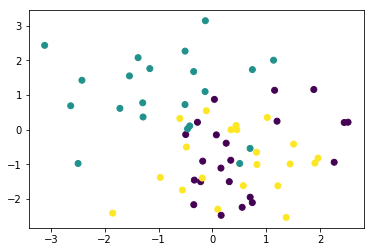

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

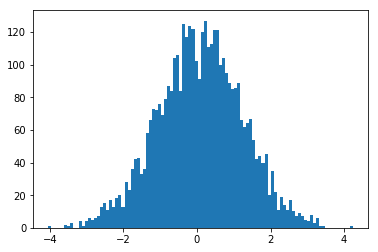

In [100]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [101]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(64,) (64, 10)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Define Activate Functions

### Sigmoid

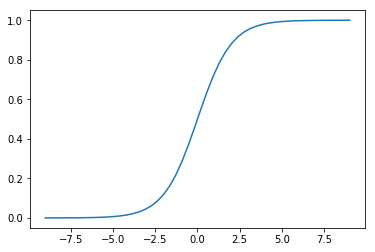

In [102]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

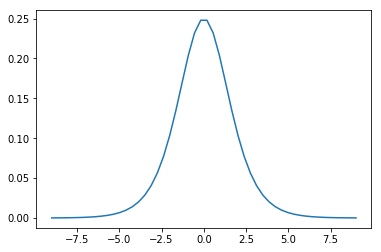

In [103]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

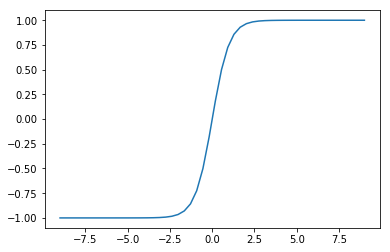

In [104]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

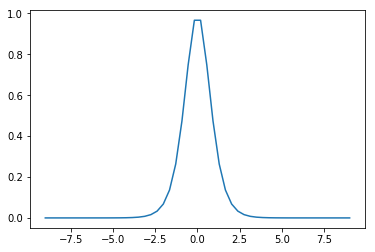

In [105]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

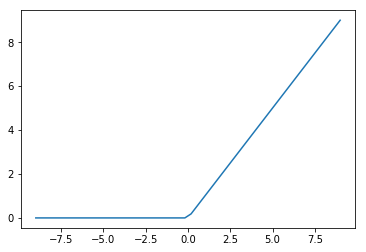

In [106]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

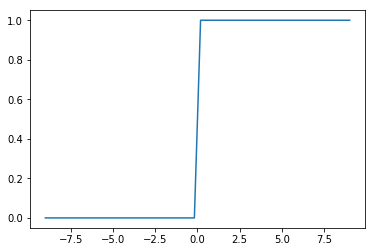

In [107]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Cross Entropy

In [108]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Plot

In [109]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=9)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)
    axes[5].hist(as_[5].ravel(), bins=100, range=range_)
    axes[6].hist(as_[6].ravel(), bins=100, range=range_)
    axes[7].hist(as_[7].ravel(), bins=100, range=range_)
    axes[8].hist(as_[8].ravel(), bins=100, range=range_)

In [110]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=8)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)
    axes[4].hist(dzs[4].ravel(), bins=100, range=range_)
    axes[5].hist(dzs[5].ravel(), bins=100, range=range_)
    axes[6].hist(dzs[6].ravel(), bins=100, range=range_)
    axes[7].hist(dzs[7].ravel(), bins=100, range=range_)

### Build a Model

In [111]:
from time import time

def train(X, y, num_epoch, learning_rate, weight_initializer, activation, activation_derivative):
    w1 = weight_initializer(64, 100)
    w2 = weight_initializer(100, 100)
    w3 = weight_initializer(100, 100)
    w4 = weight_initializer(100, 100)
    w5 = weight_initializer(100, 100)
    w6 = weight_initializer(100, 100)
    w7 = weight_initializer(100, 100)
    w8 = weight_initializer(100, 100)
    w9 = weight_initializer(100, 10)
    
    b1 = np.zeros((1, 100))
    b2 = np.zeros((1, 100))
    b3 = np.zeros((1, 100))
    b4 = np.zeros((1, 100))
    b5 = np.zeros((1, 100))
    b6 = np.zeros((1, 100))
    b7 = np.zeros((1, 100))
    b8 = np.zeros((1, 100))
    b9 = np.zeros((1, 10))

    history = []
    start = time()
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = activation(z5)

        z6 = a5.dot(w6) + b6
        a6 = activation(z6)
        z7 = a6.dot(w7) + b7
        a7 = activation(z7)
        z8 = a7.dot(w8) + b8
        a8 = activation(z8)
        z9 = a8.dot(w9) + b9
        a9 = sigmoid(z9)

        y_predict = np.argmax(a9, axis=1)
        accuracy = (y_predict == y).mean()
        
        loss = cross_entropy(y_hot, a9)

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        if accuracy > 0.99:
            break

        d9 = (a9 - y_hot)

        d8 = d9.dot(w9.T) * activation_derivative(a8)
        d7 = d8.dot(w8.T) * activation_derivative(a7)
        d6 = d7.dot(w7.T) * activation_derivative(a6)
        d5 = d6.dot(w6.T) * activation_derivative(a5)
        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w9 = w9 - learning_rate * a8.T.dot(d9)
        w8 = w8 - learning_rate * a7.T.dot(d8)
        w7 = w7 - learning_rate * a6.T.dot(d7) 
        w6 = w6 - learning_rate * a5.T.dot(d6)
        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b9 = b9 - d9.mean(axis=0)
        b8 = b8 - d8.mean(axis=0)
        b7 = b7 - d7.mean(axis=0)
        b6 = b6 - d6.mean(axis=0)
        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
   
    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    dz6 = activation_derivative(z5).dot(w6) # dz6 / dz5
    dz7 = activation_derivative(z6).dot(w7) # dz7 / dz6
    dz8 = activation_derivative(z7).dot(w8) # dz8 / dz7
    dz9 = activation_derivative(z8).dot(w9) # dz9 / dz8
    
    as_ = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
    dzs = [dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9]

    return accuracy, as_, dzs, history


### Case 1 - Small Random Number + Sigmoid

In [112]:
# Write code here!
def small_random_number(fan_in , fan_out):
    return np.random.randn(fan_in,fan_out) *0.05

num_epoch=100
learning_rate = 0.0003

accuracy, as_,dzs,sigmoid_history = train(X,y,num_epoch,learning_rate,
                                         weight_initializer=small_random_number,
                                         activation = sigmoid
                                        , activation_derivative =sigmoid_derivative)

  0 accuracy = 0.00000, loss = 0.72745
 10 accuracy = 0.34375, loss = 0.23623
 20 accuracy = 0.34375, loss = 0.21377
 30 accuracy = 0.34375, loss = 0.20612
 40 accuracy = 0.34375, loss = 0.20228
 50 accuracy = 0.34375, loss = 0.19997
 60 accuracy = 0.34375, loss = 0.19844
 70 accuracy = 0.34375, loss = 0.19734
 80 accuracy = 0.34375, loss = 0.19652
 90 accuracy = 0.34375, loss = 0.19589
----------------------------------------
 99 accuracy = 0.34375, loss = 0.19542


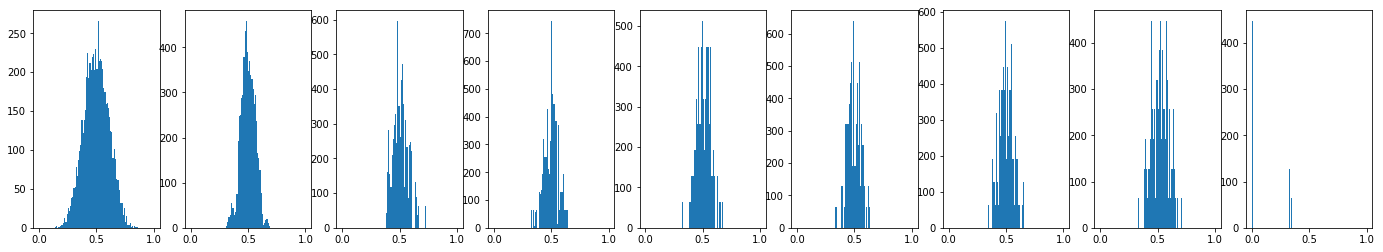

In [113]:
plot_a(as_,range_=(0.0,1.0))

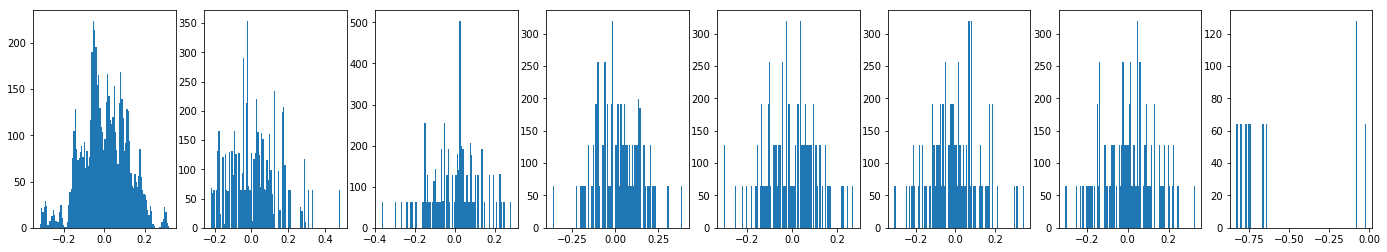

In [114]:
plot_dzs(dzs)

### Case 2 - Small Random Number + tanh

In [115]:
# Write code here!
# Write code here!
def small_random_number(fan_in , fan_out):
    return np.random.randn(fan_in,fan_out) *0.05

num_epoch=100
learning_rate = 0.0003

accuracy, as_,dzs,tanh_history = train(X,y,num_epoch,learning_rate,
                                         weight_initializer=small_random_number,
                                         activation = tanh
                                        , activation_derivative =tanh_derivative)

  0 accuracy = 0.07812, loss = 0.69325
 10 accuracy = 0.34375, loss = 0.23768
 20 accuracy = 0.34375, loss = 0.21326
 30 accuracy = 0.34375, loss = 0.20525
 40 accuracy = 0.34375, loss = 0.20134
 50 accuracy = 0.34375, loss = 0.19906
 60 accuracy = 0.34375, loss = 0.19756
 70 accuracy = 0.34375, loss = 0.19652
 80 accuracy = 0.34375, loss = 0.19574
 90 accuracy = 0.34375, loss = 0.19515
----------------------------------------
 99 accuracy = 0.34375, loss = 0.19472


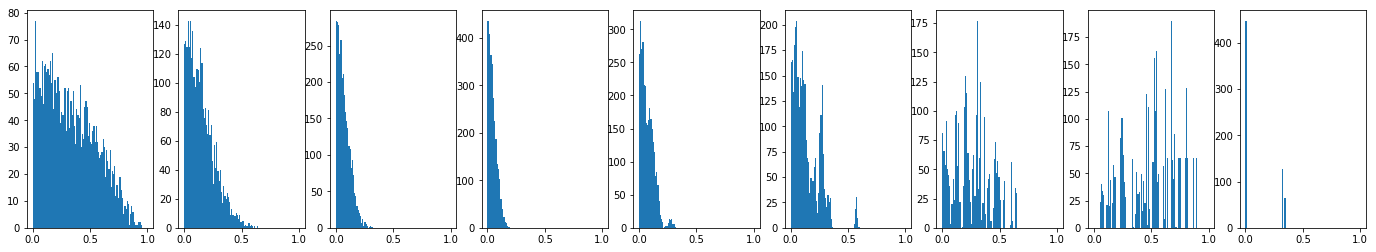

In [116]:
plot_a(as_,range_=(0.0,1.0))

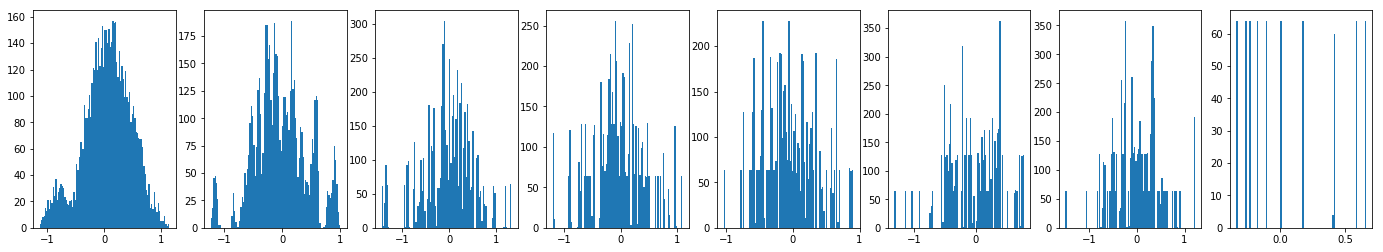

In [117]:
plot_dzs(dzs)

### Case 3 - Xavior Initialization + tanh

In [118]:
# Write code here
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in+fan_out))
    return np.random.uniform(low=-a,high=a,size = (fan_in,fan_out))
num_epoch = 100
learning_rate = 0.0003
accuracy, as_,dzs,xavior_history = train(X,y,num_epoch,learning_rate,
                                         weight_initializer=xavior_initialization,
                                         activation = tanh
                                        , activation_derivative =tanh_derivative)

  0 accuracy = 0.04688, loss = 0.68881
 10 accuracy = 0.73438, loss = 0.19477
 20 accuracy = 1.00000, loss = 0.15302
----------------------------------------
 20 accuracy = 1.00000, loss = 0.15302


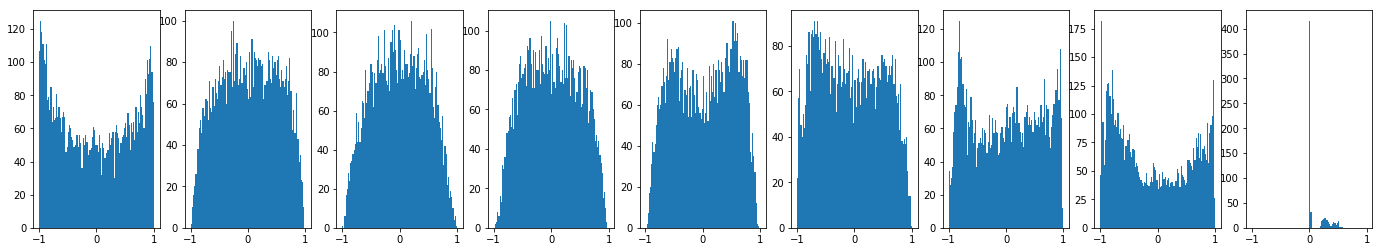

In [119]:
plot_a(as_,range_=(-1.0,1.0))

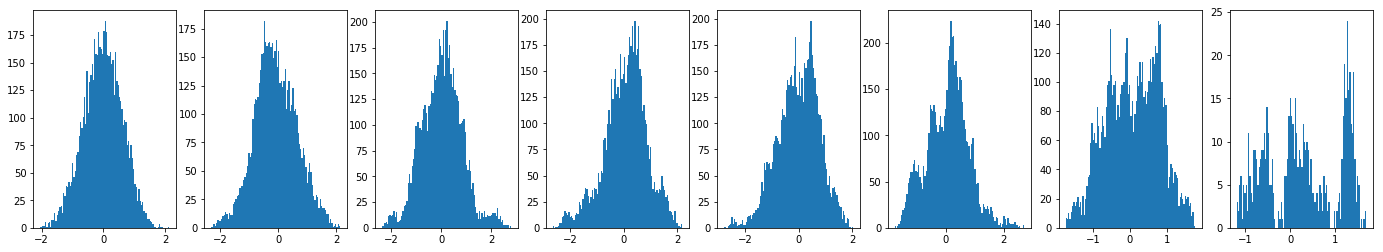

In [120]:
plot_dzs(dzs)

### Visualize

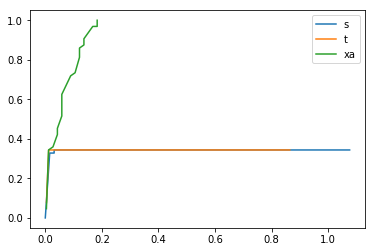

In [121]:
# Write code here!
import pandas as pd

s= pd.DataFrame(sigmoid_history)
t = pd.DataFrame(tanh_history)
xa = pd.DataFrame(xavior_history)

plt.plot(s['elapsed'],s['accuracy'],label = 's')
plt.plot(t['elapsed'],t['accuracy'],label = 't')
plt.plot(xa['elapsed'],xa['accuracy'],label = 'xa')
plt.legend()

### Case 4 - Xavior Initialization + ReLU

In [133]:
# Write code here!
# Write code here
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in+fan_out))
    return np.random.uniform(low=-a,high=a,size = (fan_in,fan_out))
num_epoch = 100
learning_rate = 0.00003
accuracy, as_,dzs,xavior_relu_history = train(X,y,num_epoch,learning_rate,
                                         weight_initializer=xavior_initialization,
                                         activation = relu
                                        , activation_derivative =relu_derivative)

  0 accuracy = 0.26562, loss = 0.68160
 10 accuracy = 0.71875, loss = 0.21651
 20 accuracy = 0.82812, loss = 0.19634
 30 accuracy = 0.85938, loss = 0.18736
 40 accuracy = 0.89062, loss = 0.18055
 50 accuracy = 0.90625, loss = 0.17413
 60 accuracy = 0.90625, loss = 0.16790
 70 accuracy = 0.93750, loss = 0.16126
 80 accuracy = 0.96875, loss = 0.15464
 90 accuracy = 0.98438, loss = 0.14756
----------------------------------------
 99 accuracy = 0.98438, loss = 0.14044


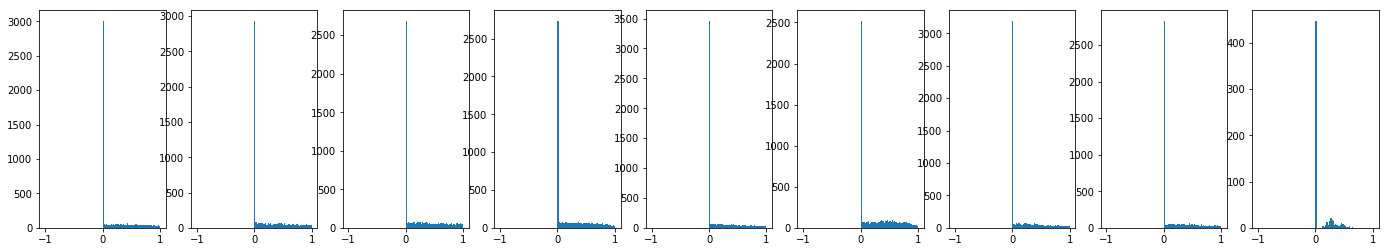

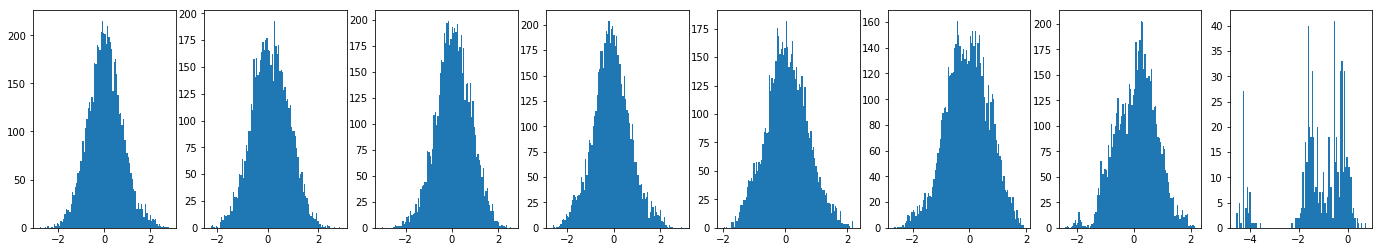

In [134]:
plot_a(as_,range_=(-1.0,1.0))
plot_dzs(dzs)

### Case 5 - He Initialization + ReLU

In [135]:
# Write code here!
# Write code here!
def he_initialization(fan_in,fan_out):
    a = np.sqrt(6 / (fan_in))
    return np.random.uniform(low=-a,high=a,size = (fan_in,fan_out))
num_epoch = 100
learning_rate = 0.00003
accuracy, as_,dzs,he_relu_history = train(X,y,num_epoch,learning_rate,
                                         weight_initializer=he_initialization,
                                         activation = relu
                                        , activation_derivative =relu_derivative)

  0 accuracy = 0.34375, loss = 0.78141
 10 accuracy = 0.79688, loss = 0.16848
 20 accuracy = 0.90625, loss = 0.12669
 30 accuracy = 0.95312, loss = 0.09739
 40 accuracy = 0.96875, loss = 0.07507
 50 accuracy = 0.98438, loss = 0.05680
----------------------------------------
 52 accuracy = 1.00000, loss = 0.05350


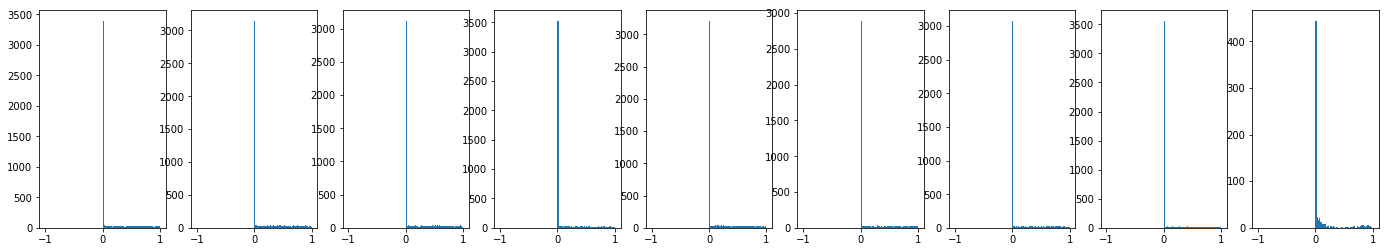

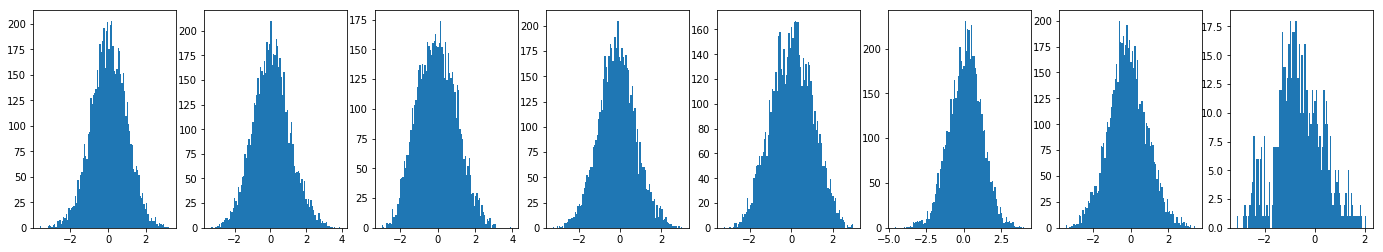

In [136]:
plot_a(as_,range_=(-1.0,1.0))
plot_dzs(dzs)

### Visualize

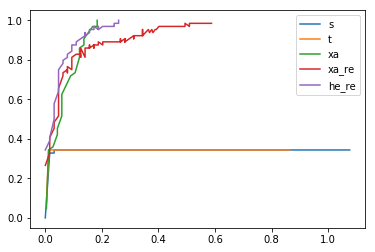

In [137]:
# Write code here!

xa_re = pd.DataFrame(xavior_relu_history)
he_re = pd.DataFrame(he_relu_history)
plt.plot(s['elapsed'],s['accuracy'],label = 's')
plt.plot(t['elapsed'],t['accuracy'],label = 't')
plt.plot(xa['elapsed'],xa['accuracy'],label = 'xa')
plt.plot(xa_re['elapsed'],xa_re['accuracy'],label='xa_re')
plt.plot(he_re['elapsed'],he_re['accuracy'],label='he_re')
plt.legend()

## real world 에서는 relu가 더 힘을 발휘할 수도.